# Cykl eksperymentu Data Science:

1. **Cel:** precyzyjne zdefiniowanie rozwiązywanego problemu
2. **Dane:** zdobycie danych do zrealizowania celu
3. **Wstępna ocena danych:** ocena przydatności danych do rozwiązania problemu
4. **Przygotowanie danych:** czyszczenie, transformacje, wzbogacanie, selekcja, etc.
5. **Modelowanie:** tworzenie modeli eksploracji danych (np. konkretne algorytmy uczenia maszynowego)
6. **Ewaluacja:** ocena i selekcja najlepszych modeli
7. **Wdrożenie:** komunikacja wyników i wniosków (często częściowo graficzna)

# Faza 1: dokładne określenie celu eksperymentu

Eksperyment data science może mieć różne cele, np.:
- wyjaśnienie możliwych przyczyn jakiegoś problemu
- zbudowanie systemu analitycznego wspierającego podejmowanie decyzji
- zbudowanie systemu do klasyfikacji jakichś obiektów
- zbudowanie systemu prognozującego jakieś zjawiska
- określenie możliwych rozwiązań problemu (i porównanie ich potencjalnej jakości)
- szacowanie ryzyka, etc.

Faza ta polega na podaniu bardzo dokładnej specyfikacji
problemu wraz z metodami ewaluacji osiągnięcia celu.

# Faza 2: pozyskanie danych

Trudność tej fazy zależy od kontekstu i zadania. Konteksty:
- **akademicki:** dane można łatwo pozyskać z istniejących ogólnodostępnych repozytoriów. Dane takie są często wstępnie przetworzone, oczyszczone i dobrze opisane.
- **badawczy, biznesowy:** pozyskanie danych może wymagać znaczących zasobów czasowych, związanych z infrastrukturą i oprogramowaniem, finansowych, prawnych, etc.

Jeśli zadanie jest oryginalne, to nawet w kontekście akademickim mogą nie być dostępne gotowe dane.

**Link:** https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
import numpy as np
import pandas as pd

hotels = pd.read_csv('data/Hotel Reservations.csv')
hotels.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


**Słownik Danych:**

- **Booking_ID**: Unikalny identyfikator każdej rezerwacji
- **no_of_adults**: Liczba osób dorosłych
- **no_of_children**: Liczba dzieci
- **no_of_weekend_nights**: Liczba nocy weekendowych (sobota lub niedziela), które gość spędził lub zarezerwował w hotelu
- **no_of_week_nights**: Liczba nocy w tygodniu (od poniedziałku do piątku), które gość spędził lub zarezerwował w hotelu
- **type_of_meal_plan**: Typ planu posiłków zarezerwowany przez klienta:
- **required_car_parking_space**: Czy klient wymaga miejsca parkingowego? (0 - Nie, 1 - Tak)
- **room_type_reserved**: Typ pokoju zarezerwowany przez klienta. Wartości są zaszyfrowane przez INN Hotels.
- **lead_time**: Liczba dni między datą rezerwacji a datą przyjazdu
- **arrival_year**: Rok daty przyjazdu
- **arrival_month**: Miesiąc daty przyjazdu
- **arrival_date**: Dzień miesiąca
- **market_segment_type**: Oznaczenie segmentu rynku.
- **repeated_guest**: Czy klient jest gościem powracającym? (0 - Nie, 1 - Tak)
- **no_of_previous_cancellations**: Liczba poprzednich rezerwacji, które zostały anulowane przez klienta przed bieżącą rezerwacją
- **no_of_previous_bookings_not_canceled**: Liczba poprzednich rezerwacji nieanulowanych przez klienta przed bieżącą rezerwacją
- **avg_price_per_room**: Średnia cena za dzień rezerwacji; ceny pokoi są dynamiczne. (w euro)
- **no_of_special_requests**: Całkowita liczba specjalnych życzeń złożonych przez klienta (np. wysokie piętro, widok z pokoju itp.)
- **booking_status**: Flaga wskazująca, czy rezerwacja została anulowana, czy nie.

# Faza 3: Wstępna ocena przydatności danych

**Przykładowe zadania:**
- wykrycie i oznaczenie brakujących wartości w danych
- wykrycie i analiza błędnych wartości
- identyfikacja potencjalnie brakujących obserwacji
- identyfikacja potencjalnie wartościowych attybutów
- identyfikacja brakujących informacji (np. atrybutów) w danych
- wykrycie potencjalnie nadmiarowych (zbędnych) atrybutów

**Przykładowe metody:**
- podsumowania (statystyki pozycyjne i rozrzutu)
- badanie rozkładów częstości zmiennych (atrybutów)
- wykrywanie wartości odstających/nietypowych
- wstępne wizualizacje
- wykrycie pewnych korelacji między zmiennymi

In [2]:
hotels.shape

(36275, 19)

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
hotels.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [5]:
hotels.select_dtypes(["int64"]).agg(['skew', 'kurtosis'])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
skew,-0.333295,4.710350,0.737616,1.599350,5.413643,1.292492,-1.669695,-0.348229,0.028809,6.002888,25.199876,19.250191,1.145081
kurtosis,0.814822,36.981856,0.298858,7.798284,27.309037,1.179594,0.787926,-0.933189,-1.157214,34.036545,732.735676,457.380085,0.881437


In [6]:
for col in hotels.columns:
    print(f"Column: {col}")
    print(hotels[col].value_counts())
    print()

Column: Booking_ID
Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Column: no_of_adults
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

Column: no_of_children
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Column: no_of_weekend_nights
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Column: no_of_week_nights
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Column: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     27835
Not

In [7]:
hotels.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

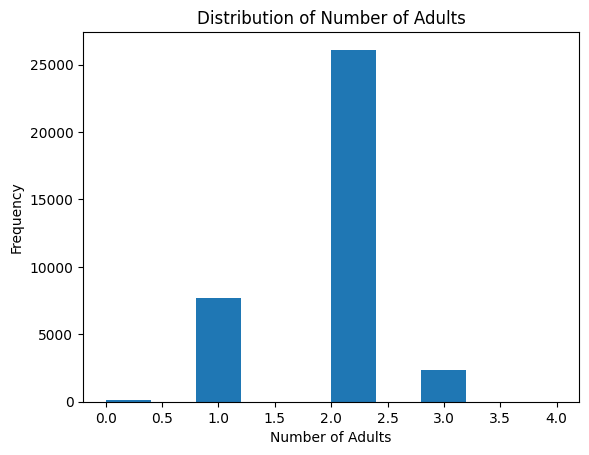

In [9]:
plt.hist(hotels.no_of_adults, bins=10)
plt.title('Distribution of Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

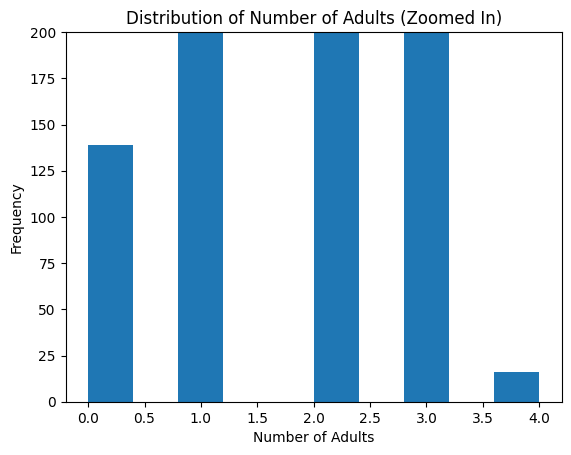

In [10]:
plt.hist(hotels.no_of_adults, bins=10)
plt.title('Distribution of Number of Adults (Zoomed In)')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.ylim(0, 200)
plt.show()

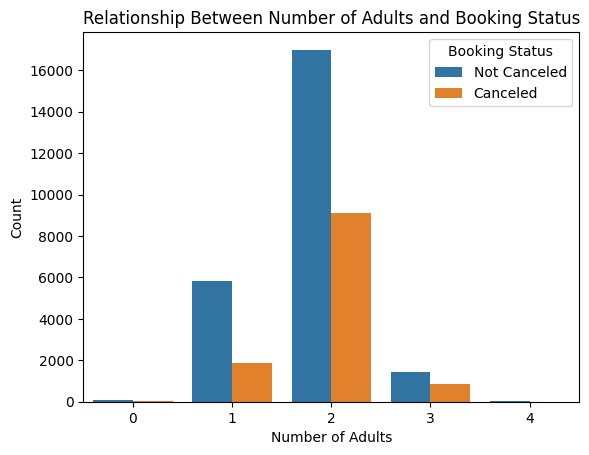

In [11]:
sns.countplot(data=hotels, x='no_of_adults', hue='booking_status')
plt.title('Relationship Between Number of Adults and Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

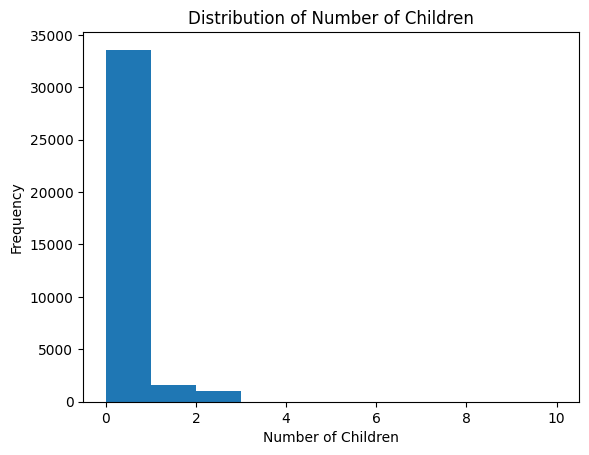

In [12]:
plt.hist(hotels.no_of_children, bins=10)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

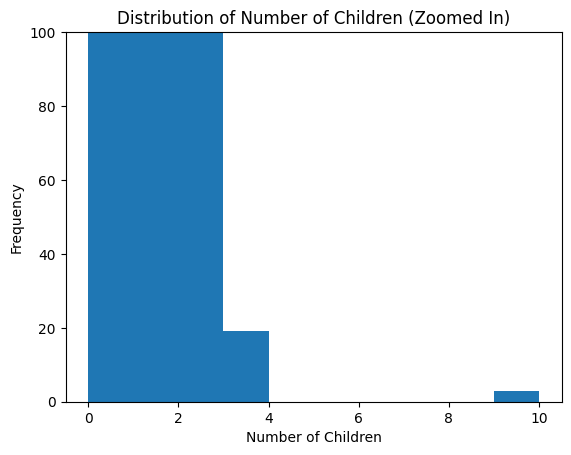

In [13]:
plt.hist(hotels.no_of_children, bins=10)
plt.title('Distribution of Number of Children (Zoomed In)')
plt.xlabel('Number of Children')
plt.ylim(0, 100)
plt.ylabel('Frequency')
plt.show()

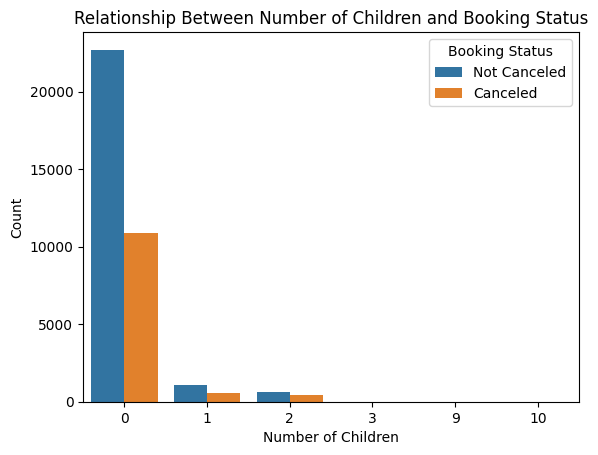

In [14]:
sns.countplot(data=hotels, x='no_of_children', hue='booking_status')
plt.title('Relationship Between Number of Children and Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
hotels.loc[hotels['no_of_adults'] == 0, :]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


In [ ]:
hotels.loc[(hotels['no_of_adults'] == 0) & (hotels['no_of_children'] == 0), :]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


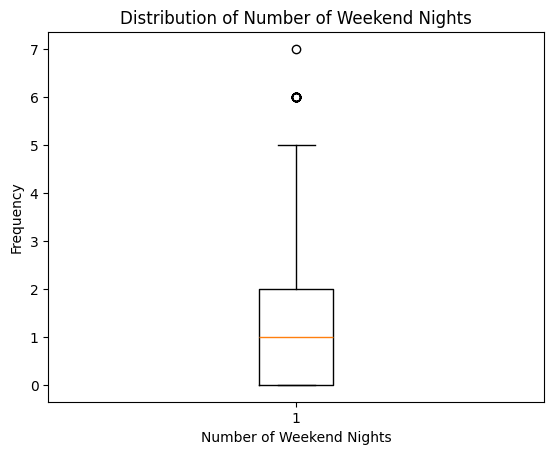

In [17]:
plt.boxplot(hotels.no_of_weekend_nights)
plt.title('Distribution of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()

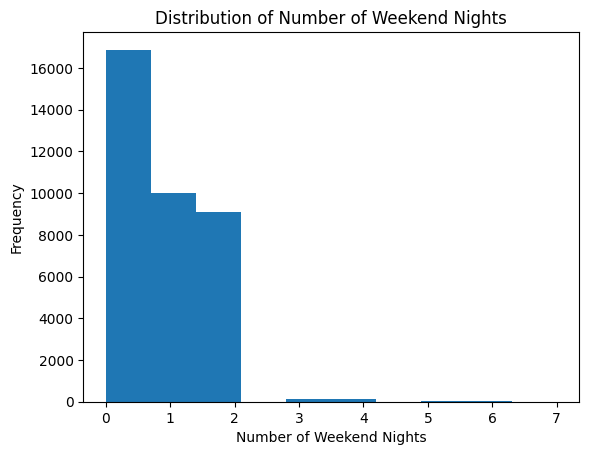

In [18]:
plt.hist(hotels.no_of_weekend_nights, bins=10)
plt.title('Distribution of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()

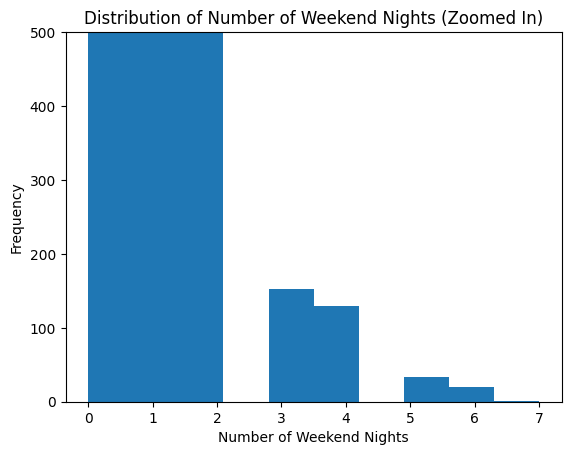

In [19]:
plt.hist(hotels.no_of_weekend_nights, bins=10)
plt.title('Distribution of Number of Weekend Nights (Zoomed In)')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.ylim(0, 500)
plt.show()

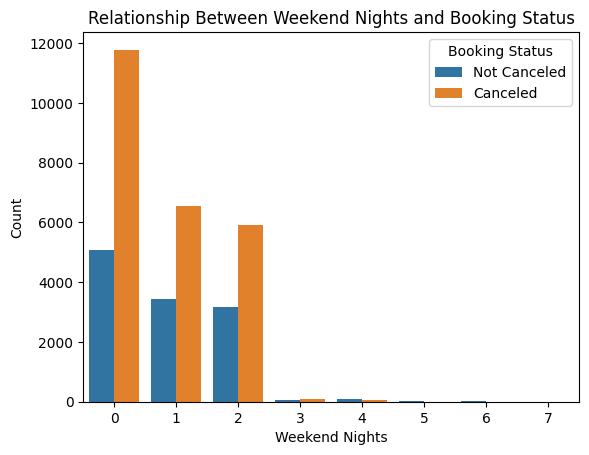

In [20]:
sns.countplot(data=hotels, x='no_of_weekend_nights', hue='booking_status')
plt.title('Relationship Between Weekend Nights and Booking Status')
plt.xlabel('Weekend Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

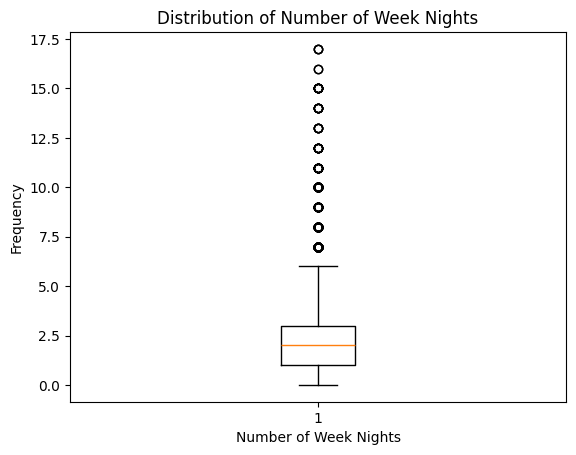

In [21]:
plt.boxplot(hotels.no_of_week_nights)
plt.title('Distribution of Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.show()

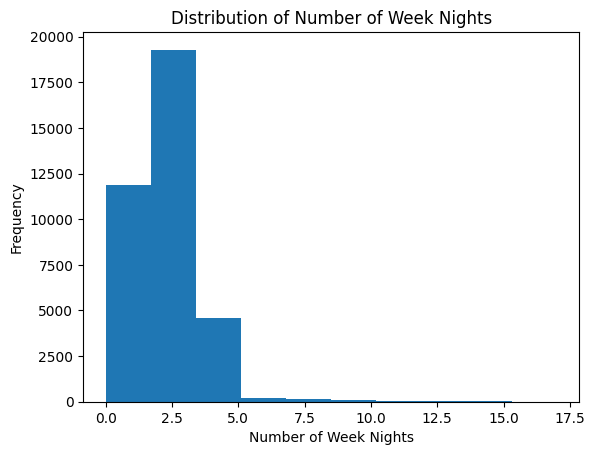

In [22]:
plt.hist(hotels.no_of_week_nights, bins=10)
plt.title('Distribution of Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.show()

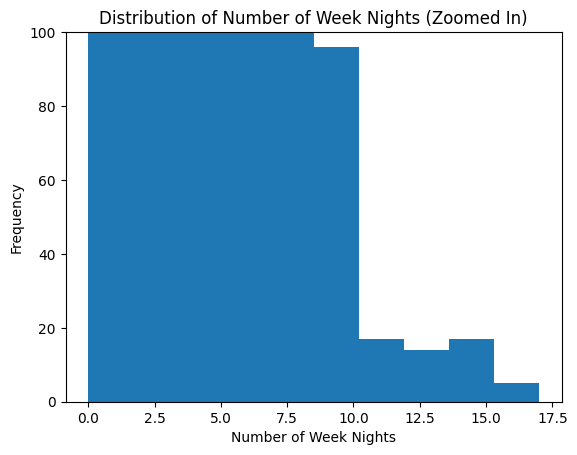

In [23]:
plt.hist(hotels.no_of_week_nights, bins=10)
plt.title('Distribution of Number of Week Nights (Zoomed In)')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

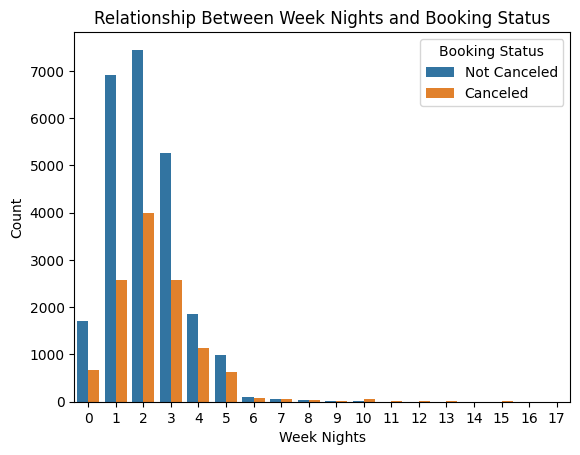

In [24]:
sns.countplot(data=hotels, x='no_of_week_nights', hue='booking_status')
plt.title('Relationship Between Week Nights and Booking Status')
plt.xlabel('Week Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

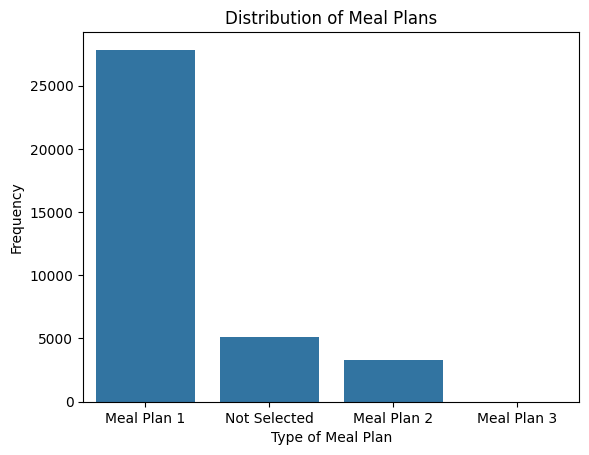

In [25]:
meal_plan_counts = hotels['type_of_meal_plan'].value_counts()
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values)
plt.title('Distribution of Meal Plans')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Frequency')
plt.show()

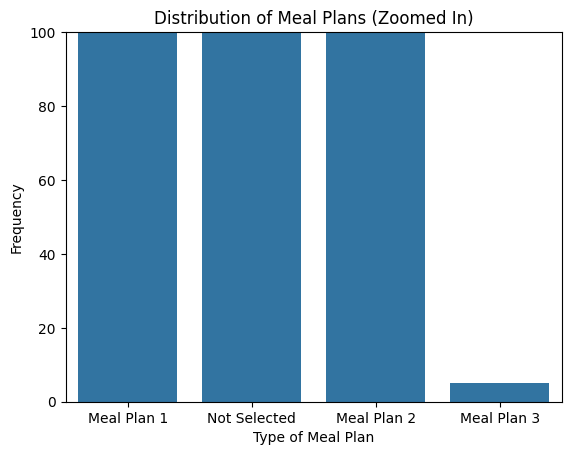

In [26]:
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values)
plt.title('Distribution of Meal Plans (Zoomed In)')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

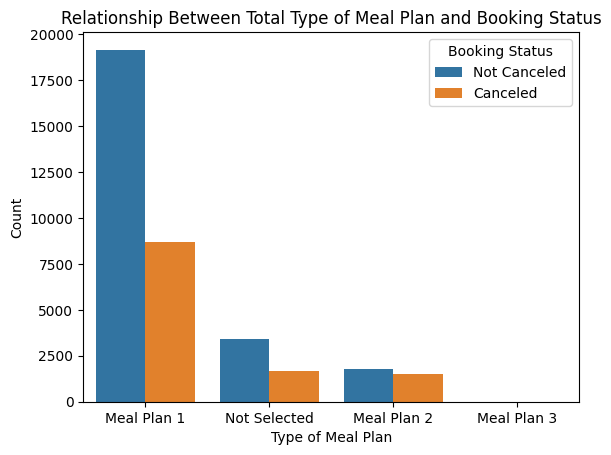

In [27]:
sns.countplot(data=hotels, x='type_of_meal_plan', hue='booking_status')
plt.title('Relationship Between Total Type of Meal Plan and Booking Status')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

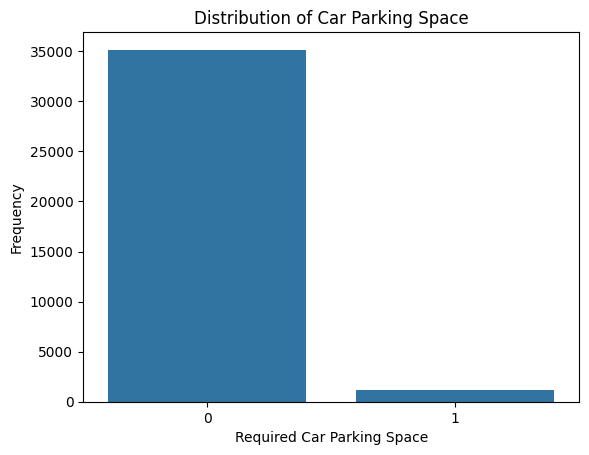

In [28]:
parking_space_counts = hotels['required_car_parking_space'].value_counts()
sns.barplot(x=parking_space_counts.index, y=parking_space_counts.values)
plt.title('Distribution of Car Parking Space')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Frequency')
plt.show()

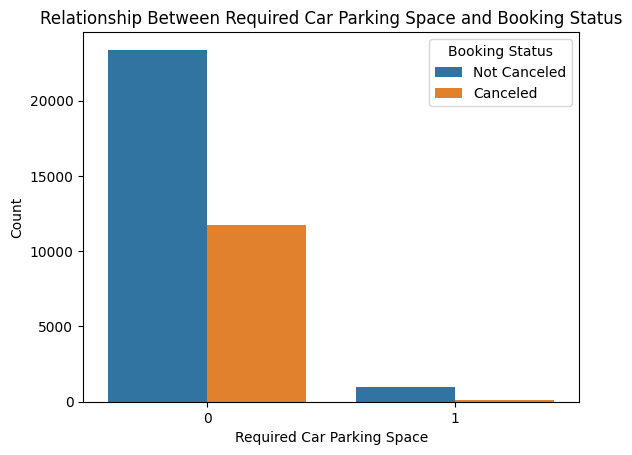

In [29]:
sns.countplot(data=hotels, x='required_car_parking_space', hue='booking_status')
plt.title('Relationship Between Required Car Parking Space and Booking Status')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

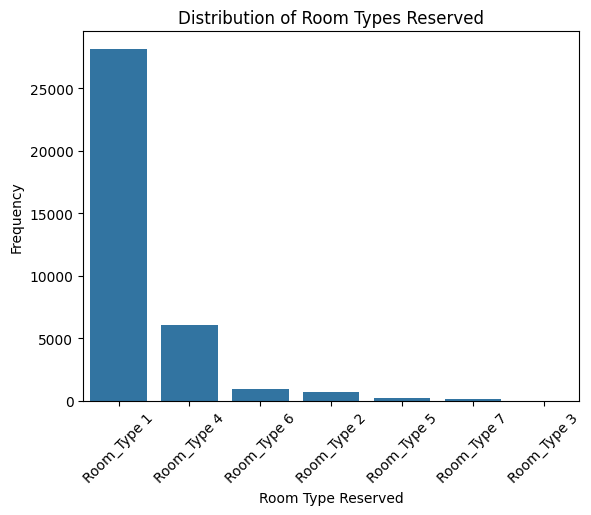

In [30]:
room_type_count = hotels['room_type_reserved'].value_counts()
sns.barplot(x=room_type_count.index, y=room_type_count.values)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

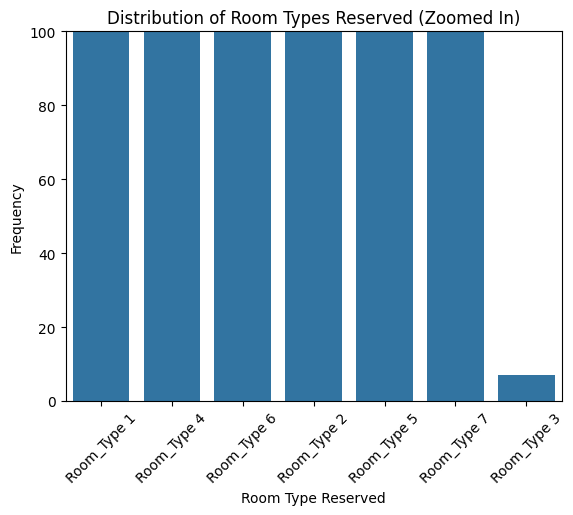

In [31]:
room_type_count = hotels['room_type_reserved'].value_counts()
sns.barplot(x=room_type_count.index, y=room_type_count.values)
plt.title('Distribution of Room Types Reserved (Zoomed In)' )
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

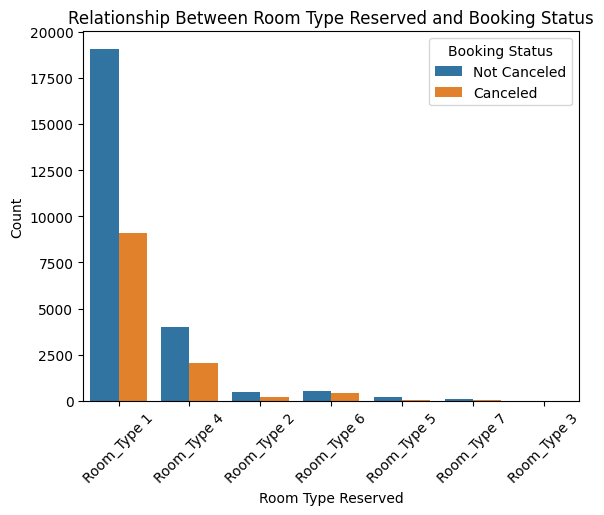

In [32]:
sns.countplot(data=hotels, x='room_type_reserved', hue='booking_status')
plt.title('Relationship Between Room Type Reserved and Booking Status')
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

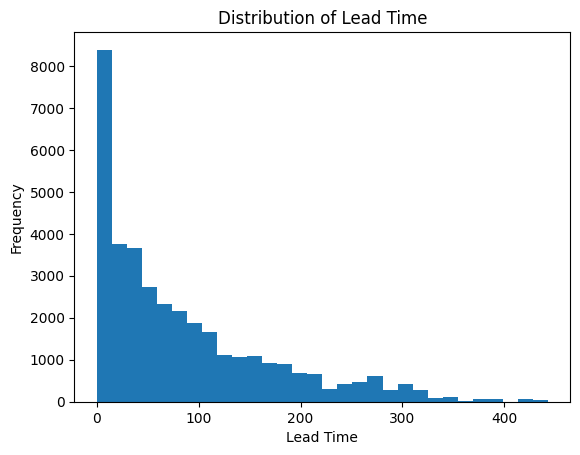

In [33]:
plt.hist(hotels.lead_time, bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

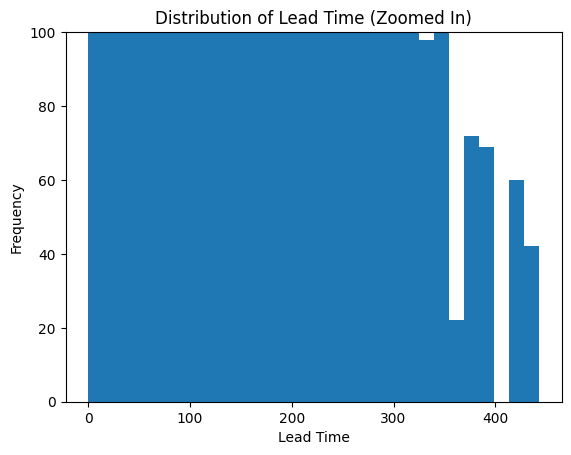

In [34]:
plt.hist(hotels.lead_time, bins=30)
plt.title('Distribution of Lead Time (Zoomed In)')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

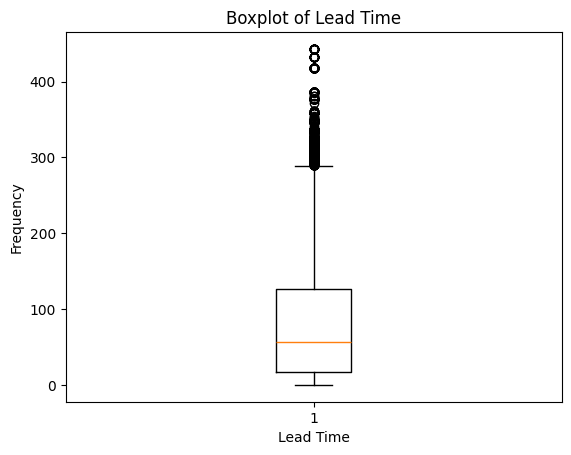

In [35]:
plt.boxplot(hotels.lead_time)
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

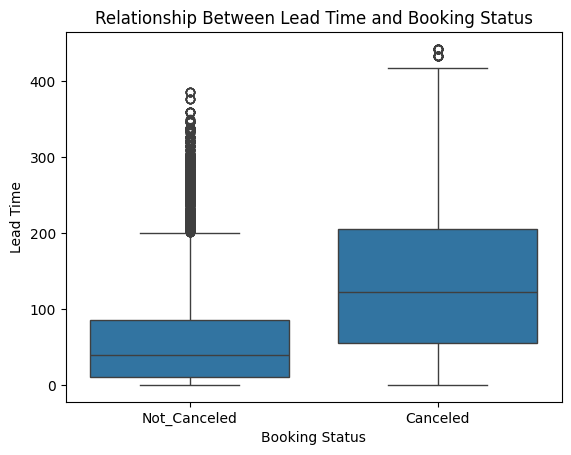

In [36]:
sns.boxplot(data=hotels, x='booking_status', y='lead_time')
plt.title('Relationship Between Lead Time and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()

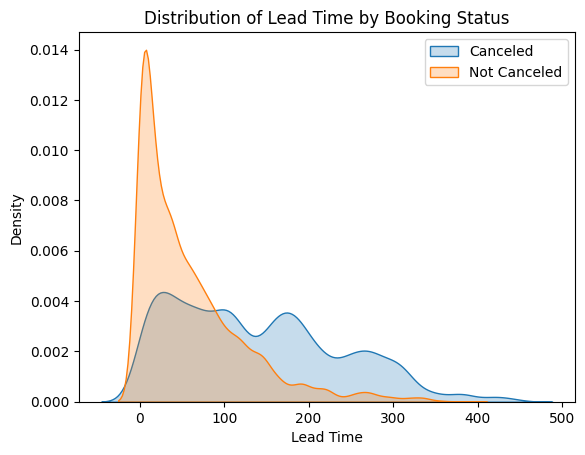

In [37]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='lead_time', label='Canceled', fill=True)
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='lead_time', label='Not Canceled', fill=True)
plt.title('Distribution of Lead Time by Booking Status')
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.legend()
plt.show()

In [38]:
hotels.groupby('booking_status')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
Canceled,11885.0,139.215482,98.947731,0.0,55.0,122.0,205.0,443.0
Not_Canceled,24390.0,58.927224,64.028714,0.0,10.0,39.0,86.0,386.0


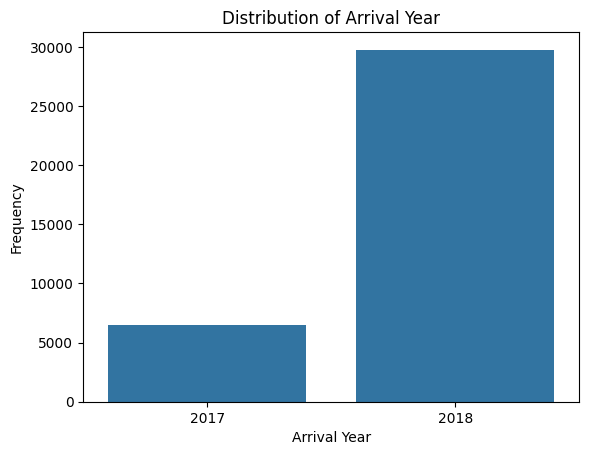

In [39]:
year_count = hotels['arrival_year'].value_counts()
sns.barplot(x=year_count.index, y=year_count.values)
plt.title('Distribution of Arrival Year')
plt.xlabel('Arrival Year')
plt.ylabel('Frequency')
plt.show()

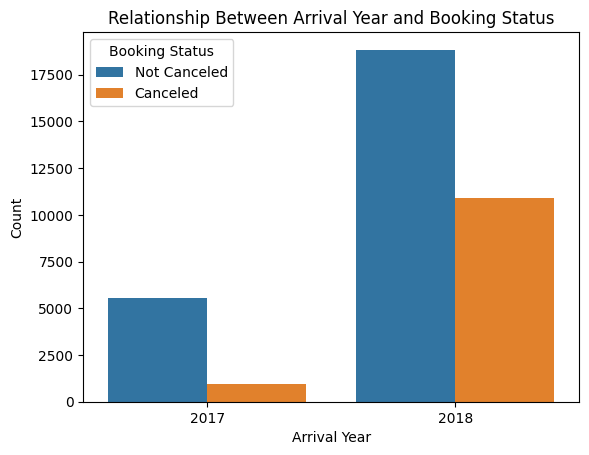

In [40]:
sns.countplot(data=hotels, x='arrival_year', hue='booking_status')
plt.title('Relationship Between Arrival Year and Booking Status')
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

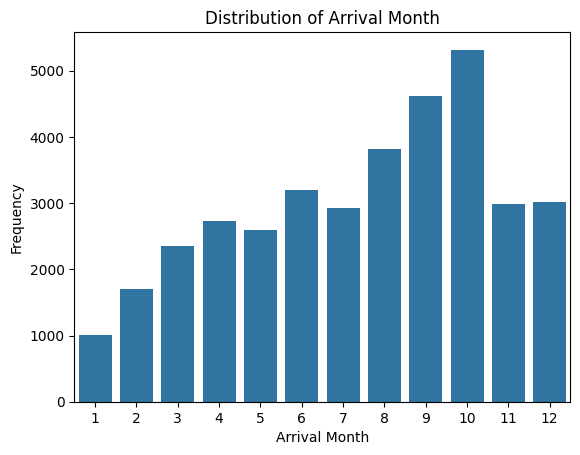

In [41]:
month_count = hotels['arrival_month'].value_counts()
sns.barplot(x=month_count.index, y=month_count.values)
plt.title('Distribution of Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Frequency')
plt.show()

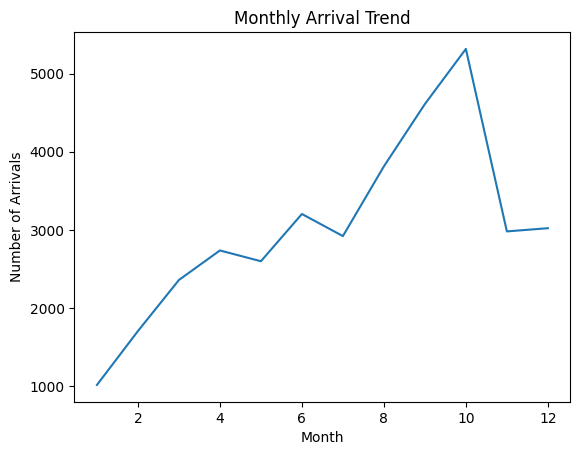

In [42]:
hotels['arrival_month'].value_counts().sort_index().plot(kind='line')
plt.title('Monthly Arrival Trend')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.show()

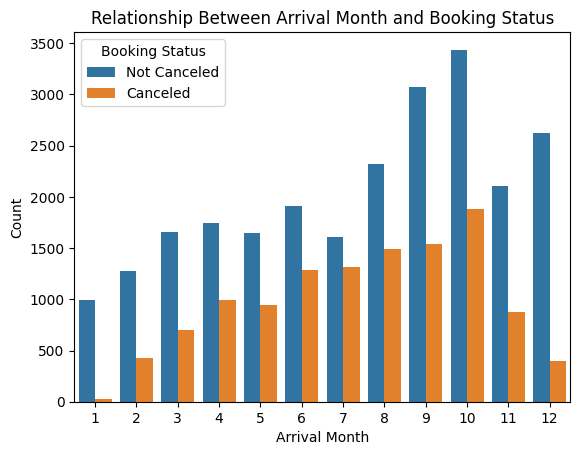

In [43]:
sns.countplot(data=hotels, x='arrival_month', hue='booking_status')
plt.title('Relationship Between Arrival Month and Booking Status')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

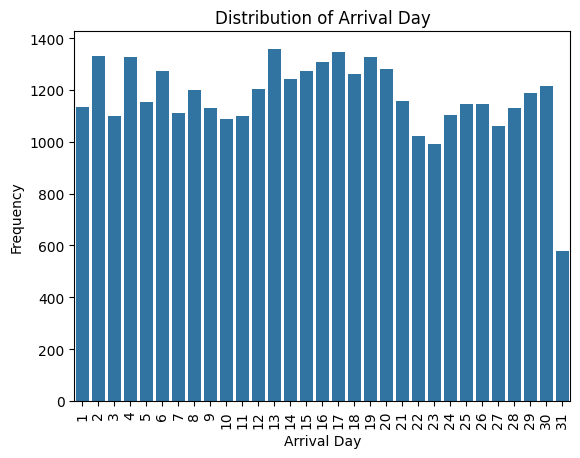

In [44]:
# plt.hist(hotels.arrival_date, bins=30)
day_count = hotels['arrival_date'].value_counts()
sns.barplot(x=day_count.index, y=day_count.values)
plt.title('Distribution of Arrival Day')
plt.xlabel('Arrival Day')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

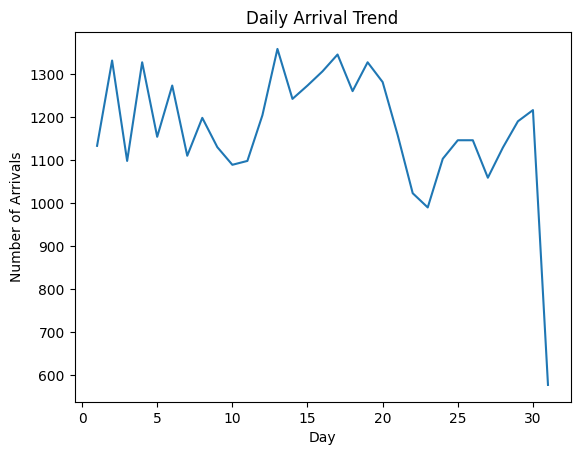

In [45]:
hotels['arrival_date'].value_counts().sort_index().plot(kind='line')
plt.title('Daily Arrival Trend')
plt.xlabel('Day')
plt.ylabel('Number of Arrivals')
plt.show()

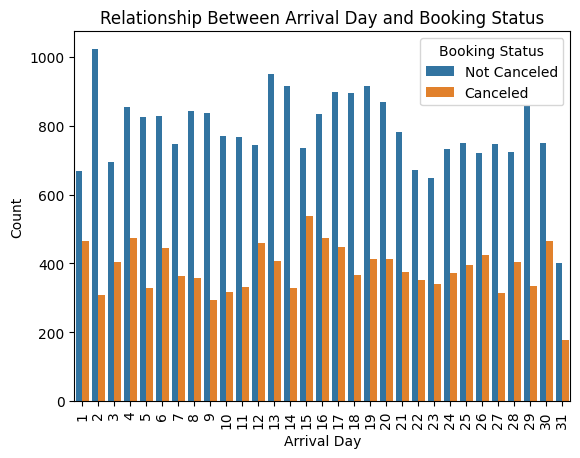

In [46]:
sns.countplot(data=hotels, x='arrival_date', hue='booking_status')
plt.title('Relationship Between Arrival Day and Booking Status')
plt.xlabel('Arrival Day')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=90)
plt.show()

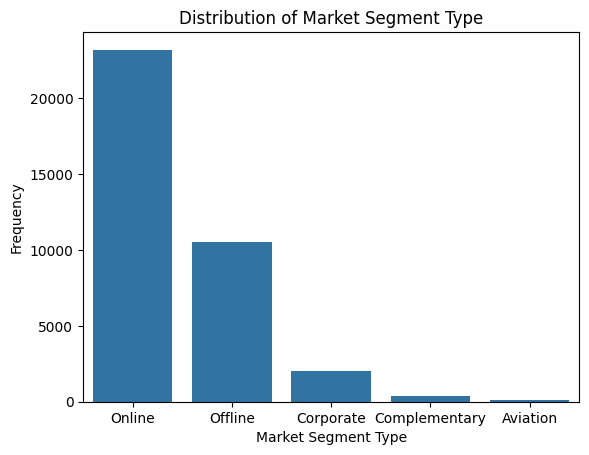

In [47]:
market_segment_count = hotels['market_segment_type'].value_counts()
sns.barplot(x=market_segment_count.index, y=market_segment_count.values)
plt.title('Distribution of Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Frequency')
plt.show()

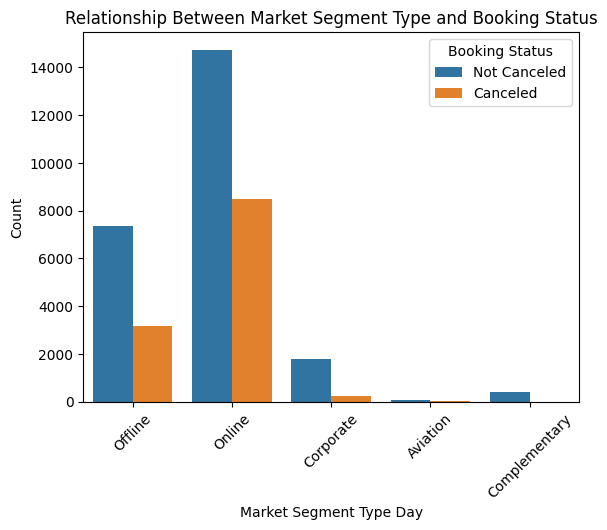

In [48]:
sns.countplot(data=hotels, x='market_segment_type', hue='booking_status')
plt.title('Relationship Between Market Segment Type and Booking Status')
plt.xlabel('Market Segment Type Day')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

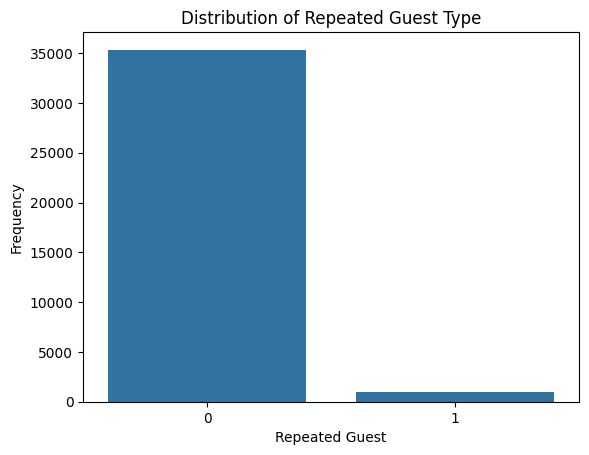

In [49]:
repeated_guest_count = hotels['repeated_guest'].value_counts()
sns.barplot(x=repeated_guest_count.index, y=repeated_guest_count.values)
plt.title('Distribution of Repeated Guest Type')
plt.xlabel('Repeated Guest')
plt.ylabel('Frequency')
plt.show()

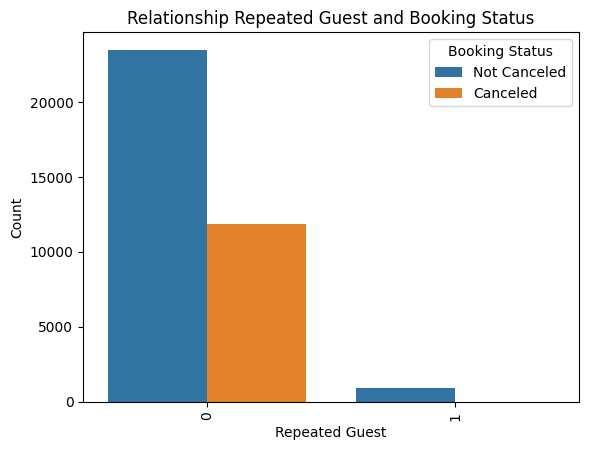

In [50]:
sns.countplot(data=hotels, x='repeated_guest', hue='booking_status')
plt.title('Relationship Repeated Guest and Booking Status')
plt.xlabel('Repeated Guest')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

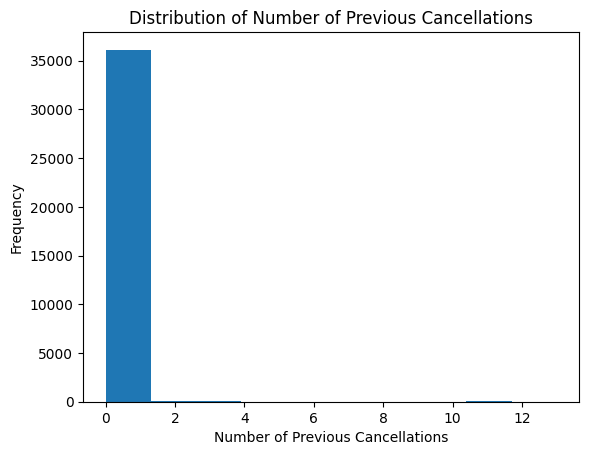

In [51]:
plt.hist(hotels.no_of_previous_cancellations, bins=10)
plt.title('Distribution of Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.show()

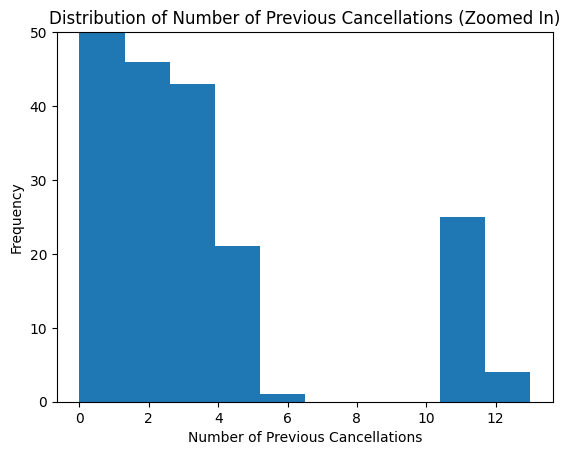

In [52]:
plt.hist(hotels.no_of_previous_cancellations, bins=10)
plt.title('Distribution of Number of Previous Cancellations (Zoomed In)')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

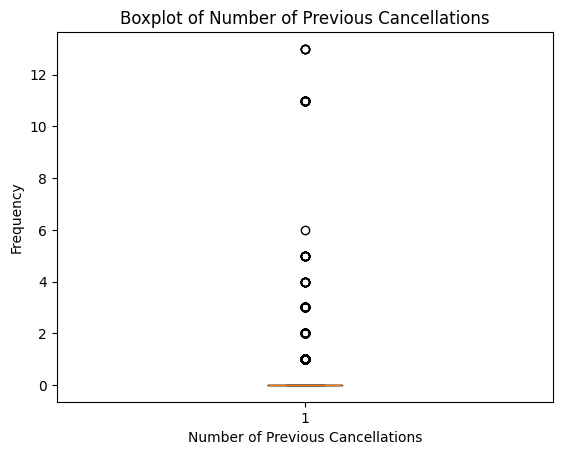

In [53]:
plt.boxplot(hotels.no_of_previous_cancellations)
plt.title('Boxplot of Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.show()

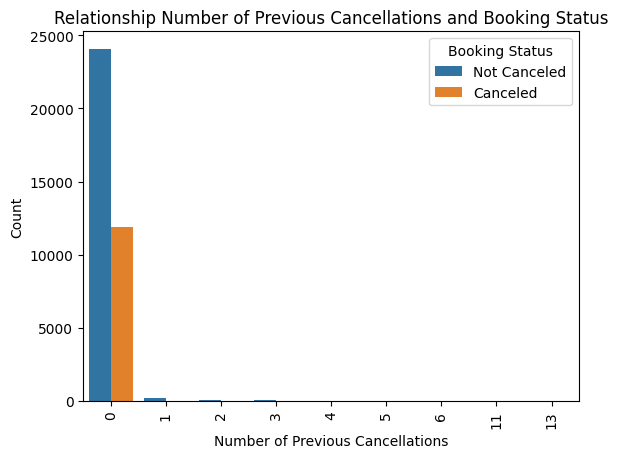

In [54]:
sns.countplot(data=hotels, x='no_of_previous_cancellations', hue='booking_status')
plt.title('Relationship Number of Previous Cancellations and Booking Status')
plt.xlabel('Number of Previous Cancellations')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

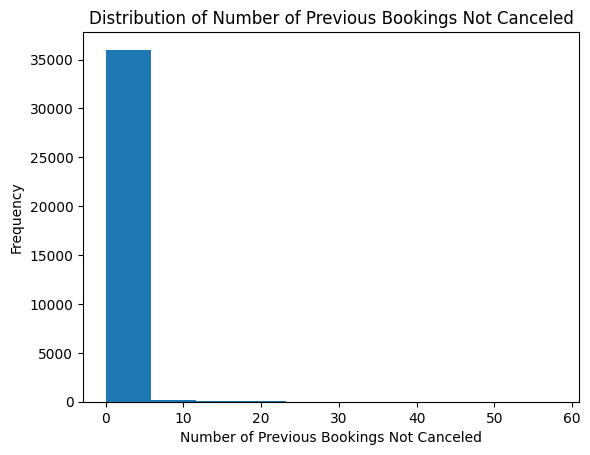

In [55]:
plt.hist(hotels.no_of_previous_bookings_not_canceled, bins=10)
plt.title('Distribution of Number of Previous Bookings Not Canceled')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.show()

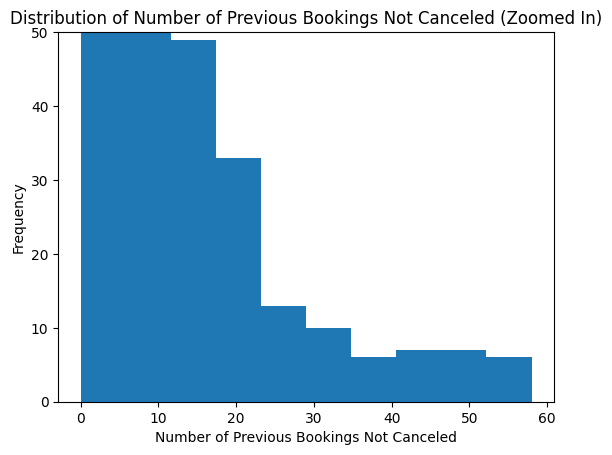

In [56]:
plt.hist(hotels.no_of_previous_bookings_not_canceled, bins=10)
plt.title('Distribution of Number of Previous Bookings Not Canceled (Zoomed In)')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

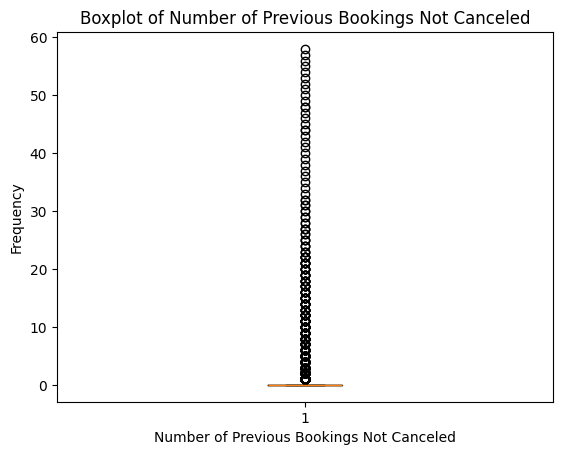

In [57]:
plt.boxplot(hotels.no_of_previous_bookings_not_canceled)
plt.title('Boxplot of Number of Previous Bookings Not Canceled')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.show()

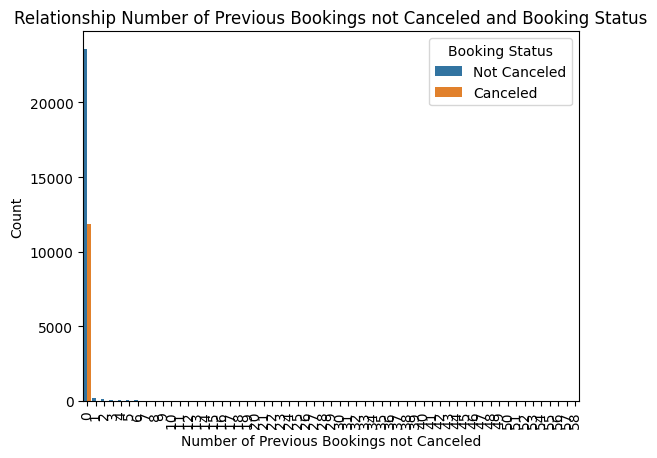

In [58]:
sns.countplot(data=hotels, x='no_of_previous_bookings_not_canceled', hue='booking_status')
plt.title('Relationship Number of Previous Bookings not Canceled and Booking Status')
plt.xlabel('Number of Previous Bookings not Canceled')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

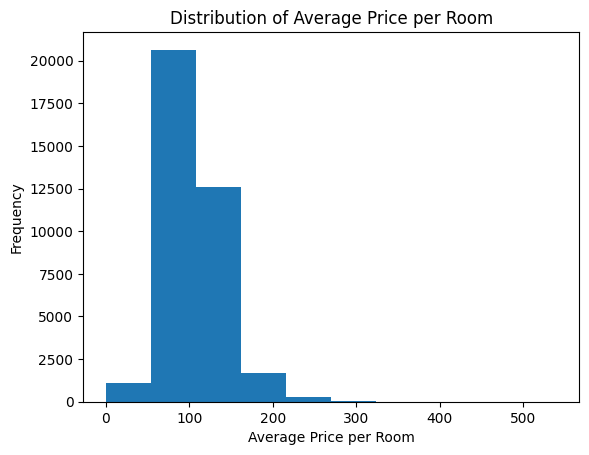

In [59]:
plt.hist(hotels.avg_price_per_room, bins=10)
plt.title('Distribution of Average Price per Room')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.show()

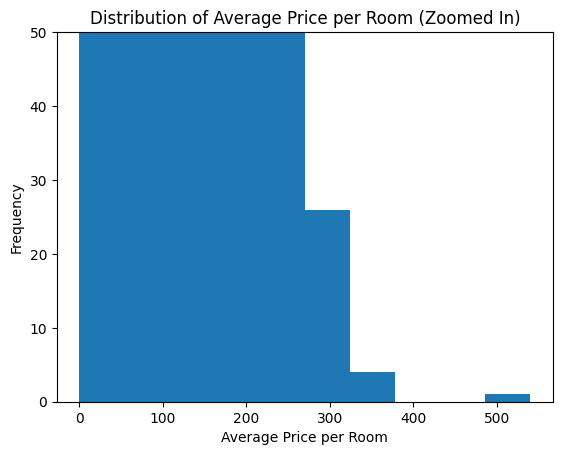

In [60]:
plt.hist(hotels.avg_price_per_room, bins=10)
plt.title('Distribution of Average Price per Room (Zoomed In)')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

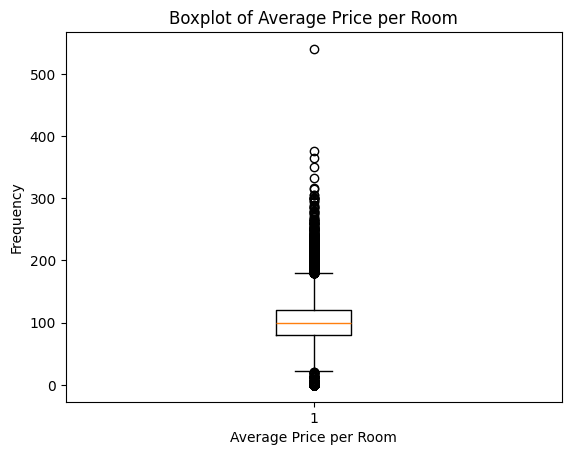

In [61]:
plt.boxplot(hotels.avg_price_per_room)
plt.title('Boxplot of Average Price per Room')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.show()

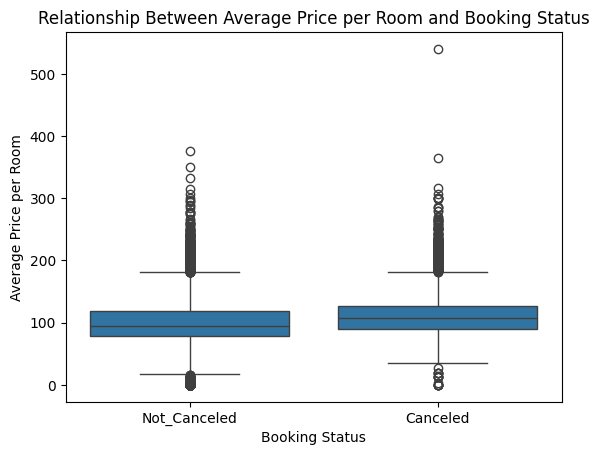

In [62]:
sns.boxplot(data=hotels, x='booking_status', y='avg_price_per_room')
plt.title('Relationship Between Average Price per Room and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.show()

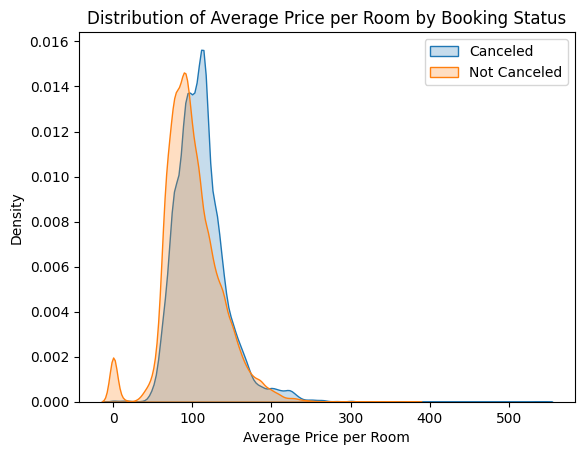

In [63]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='avg_price_per_room', label='Canceled', fill=True)
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='avg_price_per_room', label='Not Canceled', fill=True)
plt.title('Distribution of Average Price per Room by Booking Status')
plt.xlabel('Average Price per Room')
plt.ylabel('Density')
plt.legend()
plt.show()

In [64]:
hotels[hotels['avg_price_per_room'] < 50].avg_price_per_room.value_counts()

avg_price_per_room
0.00     545
6.00      25
48.00     23
45.00     21
38.67     17
        ... 
32.50      1
45.87      1
44.67      1
41.76      1
42.50      1
Name: count, Length: 95, dtype: int64

In [65]:
len(hotels[hotels['avg_price_per_room'] < 50])

896

In [66]:
hotels.groupby('booking_status')['avg_price_per_room'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
Canceled,11885.0,110.589966,32.264394,0.0,89.27,108.0,126.36,540.0
Not_Canceled,24390.0,99.931412,35.872154,0.0,77.86,95.0,119.10,375.5


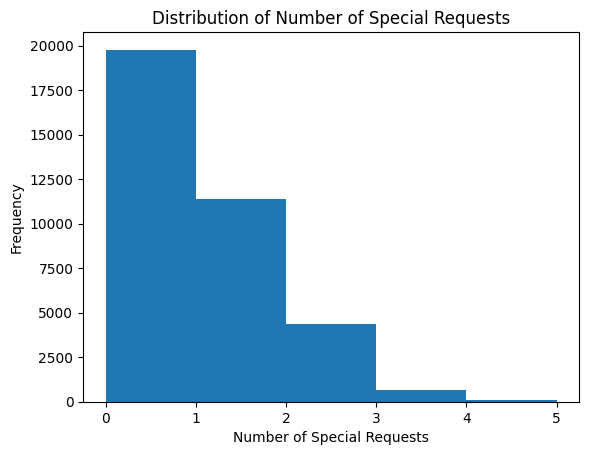

In [67]:
# special_requests_counts = hotels['no_of_special_requests'].value_counts()
# sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values)
plt.hist(hotels.no_of_special_requests, bins=5)
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()

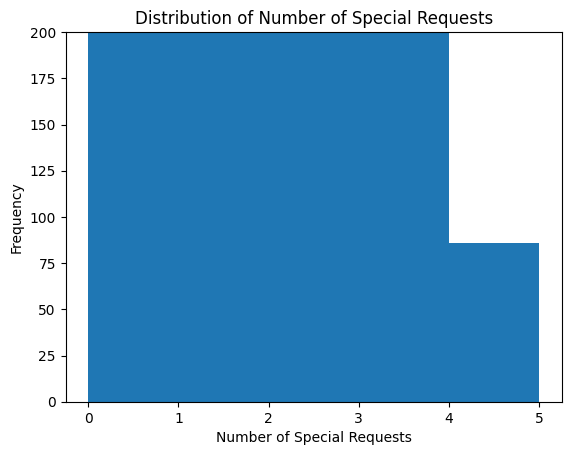

In [68]:
# sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values)
plt.hist(hotels.no_of_special_requests, bins=5)
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.ylim(0, 200)
plt.show()

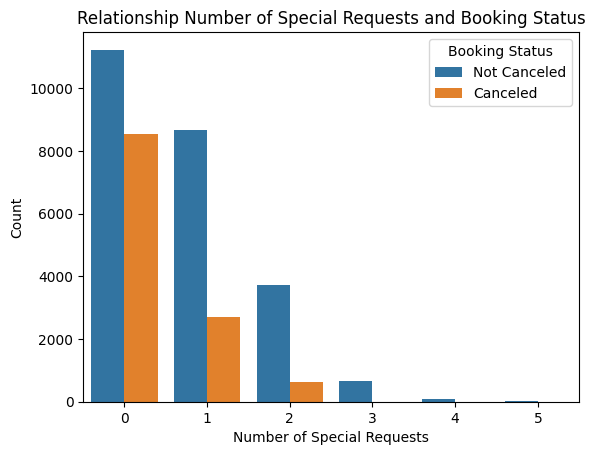

In [69]:
sns.countplot(data=hotels, x='no_of_special_requests', hue='booking_status')
plt.title('Relationship Number of Special Requests and Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

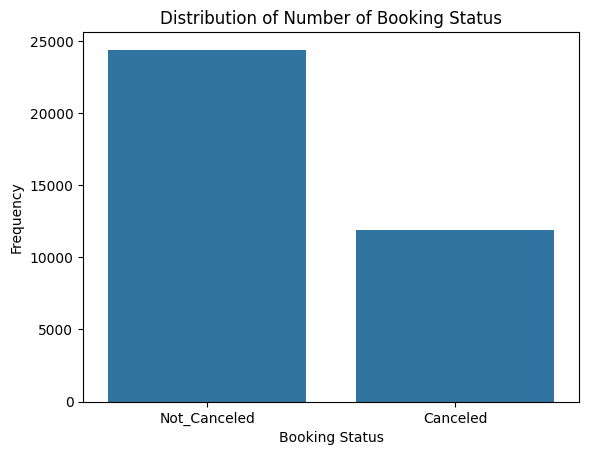

In [70]:
booking_status_counts = hotels['booking_status'].value_counts()
sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values)
plt.xlabel('Booking Status')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Booking Status')
plt.show()

# Faza 4: Przygotowanie danych do modelowania

**Przykładowe operacje:**
- uzupełnianie brakujących wartości
- poprawianie błędnych wartości
- kwestia wartości odstających/nietypowych (ang. outliers)
- normalizacja
- standaryzacja
- dyskretyzacja
- uogólnianie
- numerowanie stanów
- selekcja atrybutów
- filtrowanie obserwacji
- redukcja wymiarów (np. PCA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hotels = pd.read_csv('data/Hotel Reservations.csv')

In [6]:
hotels.shape

(36275, 19)

In [7]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
hotels = hotels.drop(columns=['Booking_ID'])

In [9]:
hotels = hotels[(hotels['no_of_adults'] > 0) & (hotels['no_of_adults'] <= 3)]

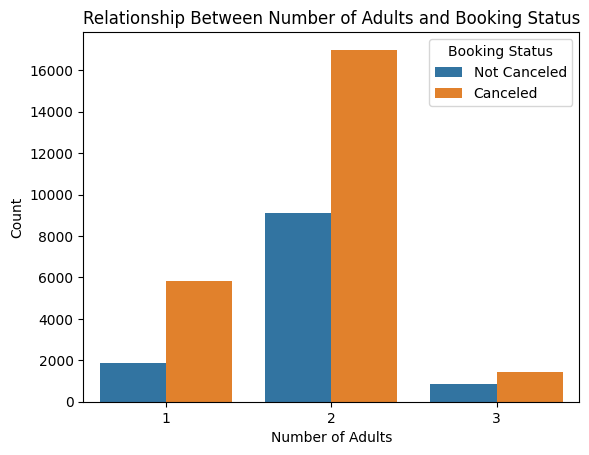

In [10]:
sns.countplot(data=hotels, x='no_of_adults', hue='booking_status')
plt.title('Relationship Between Number of Adults and Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [11]:
hotels = hotels[hotels['no_of_children'] < 3]

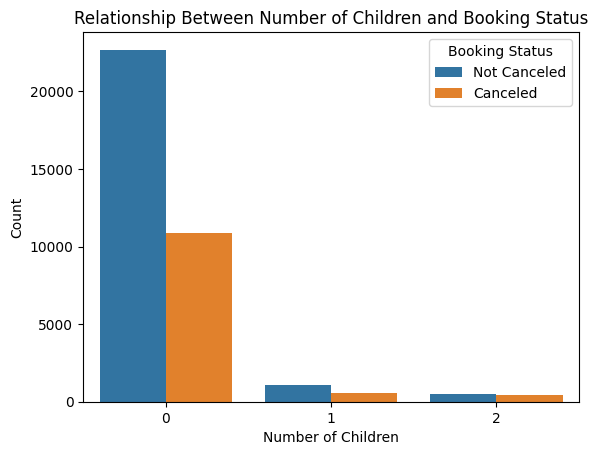

In [12]:
sns.countplot(data=hotels, x='no_of_children', hue='booking_status')
plt.title('Relationship Between Number of Children and Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [13]:
hotels['no_of_guests'] = hotels['no_of_adults'] + hotels['no_of_children']

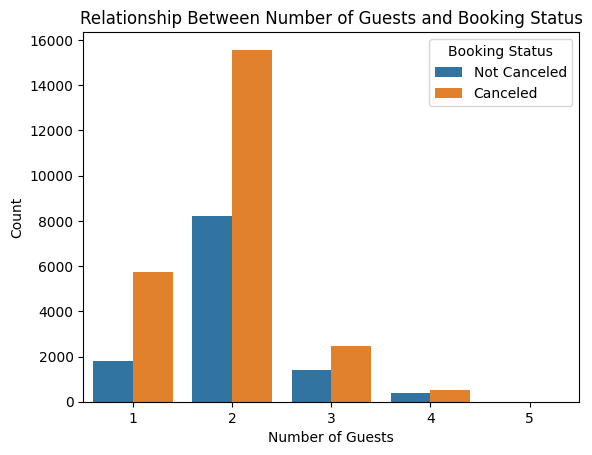

In [14]:
sns.countplot(data=hotels, x='no_of_guests', hue='booking_status')
plt.title('Relationship Between Number of Guests and Booking Status')
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [15]:
hotels = hotels[hotels['no_of_weekend_nights'] <= 2]

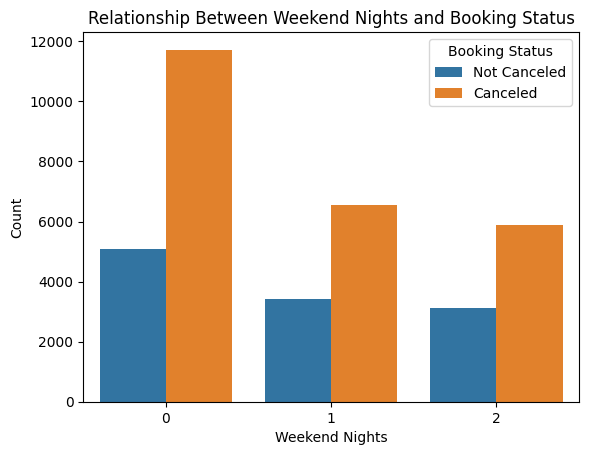

In [16]:
sns.countplot(data=hotels, x='no_of_weekend_nights', hue='booking_status')
plt.title('Relationship Between Weekend Nights and Booking Status')
plt.xlabel('Weekend Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [17]:
hotels = hotels[hotels['no_of_week_nights'] <= 5]

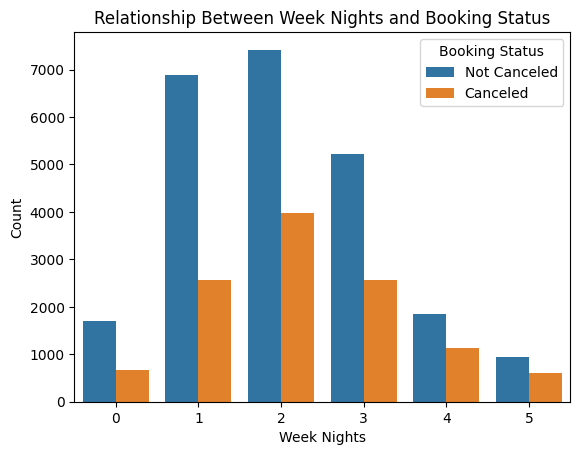

In [18]:
sns.countplot(data=hotels, x='no_of_week_nights', hue='booking_status')
plt.title('Relationship Between Week Nights and Booking Status')
plt.xlabel('Week Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [19]:
hotels['no_of_nights'] = hotels['no_of_weekend_nights'] + hotels['no_of_week_nights']

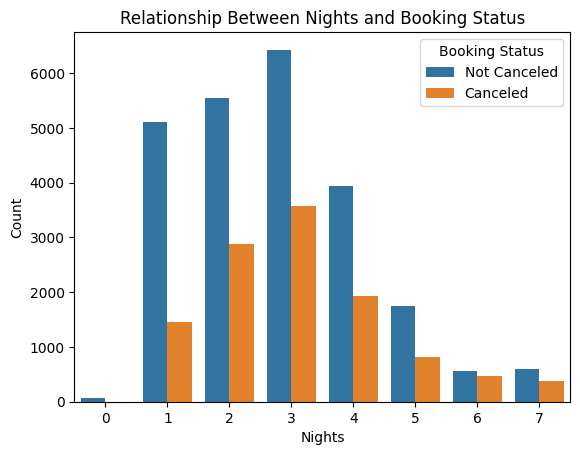

In [20]:
sns.countplot(data=hotels, x='no_of_nights', hue='booking_status')
plt.title('Relationship Between Nights and Booking Status')
plt.xlabel('Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [21]:
def visit_type(row) -> str:
    if row['no_of_week_nights'] > 0 and row['no_of_weekend_nights'] == 0:
        return 'Week'
    elif row['no_of_weekend_nights'] > 0 and row['no_of_week_nights'] == 0:
        return 'Weekend'
    elif row['no_of_week_nights'] > 0 and row['no_of_weekend_nights'] > 0:
        return 'Both'
    return 'None'

hotels['visit_type'] = hotels.apply(visit_type, axis=1)

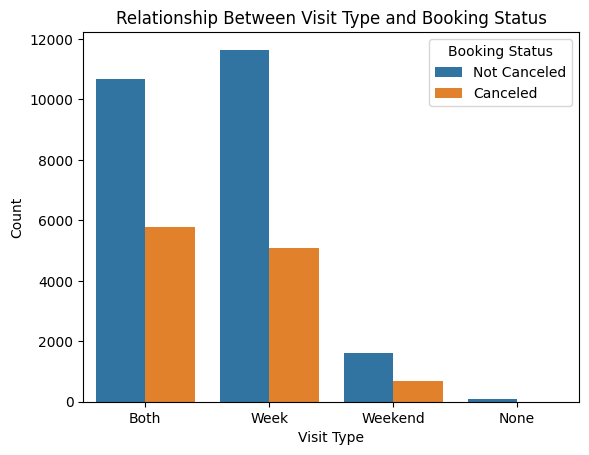

In [22]:
sns.countplot(data=hotels, x='visit_type', hue='booking_status')
plt.title('Relationship Between Visit Type and Booking Status')
plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [23]:
hotels['meal_type'] = hotels['type_of_meal_plan'].apply(lambda x: 0 if x == 'Not Selected' else 1)

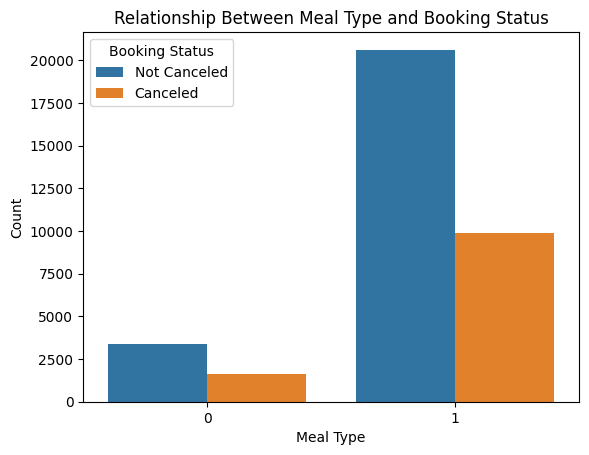

In [24]:
sns.countplot(data=hotels, x='meal_type', hue='booking_status')
plt.title('Relationship Between Meal Type and Booking Status')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [25]:
hotels = hotels.drop(columns=['room_type_reserved'])

In [26]:
hotels = hotels.drop(columns=['arrival_year'])

In [27]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

hotels['arrival_season'] = hotels['arrival_month'].apply(month_to_season)

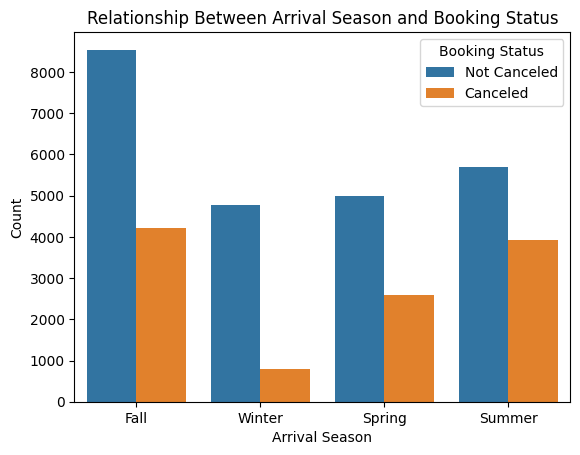

In [28]:
sns.countplot(data=hotels, x='arrival_season', hue='booking_status')
plt.title('Relationship Between Arrival Season and Booking Status')
plt.xlabel('Arrival Season')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [29]:
def date_to_week(day):
    if 1 <= day <= 7:
        return 'Week 1'
    elif 8 <= day <= 14:
        return 'Week 2'
    elif 15 <= day <= 21:
        return 'Week 3'
    else:
        return 'Week 4'

hotels['arrival_week'] = hotels['arrival_date'].apply(date_to_week)

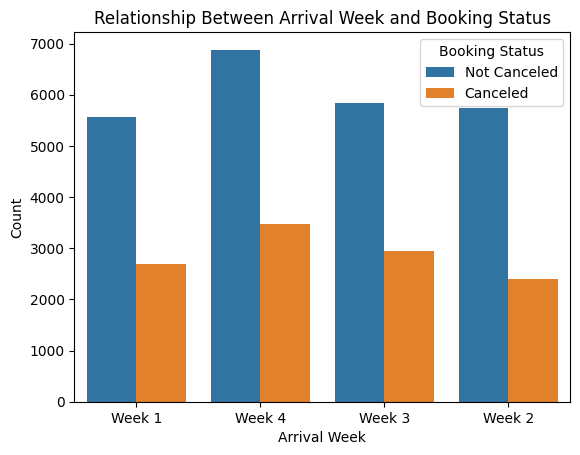

In [30]:
sns.countplot(data=hotels, x='arrival_week', hue='booking_status')
plt.title('Relationship Between Arrival Week and Booking Status')
plt.xlabel('Arrival Week')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [31]:
def categorize_market_segment(segment):
    online = ['Online', 'Aviation']
    offline = ['Offline', 'Corporate', 'Direct']
    
    if segment in online:
        return 'Online'
    elif segment in offline:
        return 'Offline'
    else:
        return 'Others'

hotels['market_type'] = hotels['market_segment_type'].apply(categorize_market_segment)

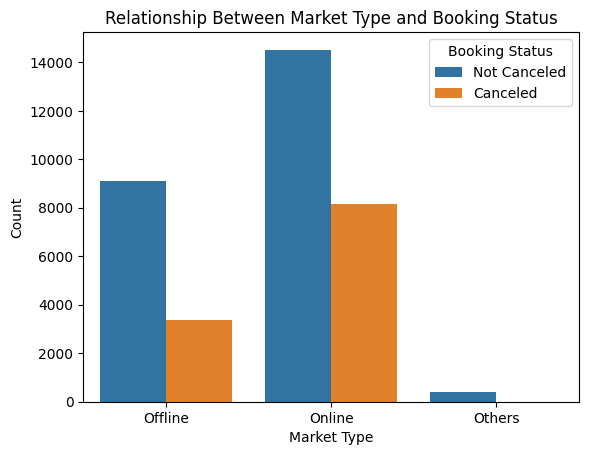

In [32]:
sns.countplot(data=hotels, x='market_type', hue='booking_status')
plt.title('Relationship Between Market Type and Booking Status')
plt.xlabel('Market Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [33]:
hotels['previously_canceled'] = (hotels['no_of_previous_bookings_not_canceled'] - hotels['no_of_previous_cancellations']).apply(lambda x: 1 if x > 0 else 0)

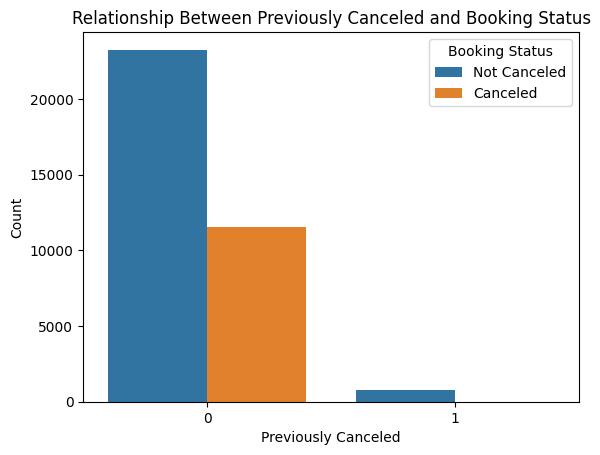

In [34]:
sns.countplot(data=hotels, x='previously_canceled', hue='booking_status')
plt.title('Relationship Between Previously Canceled and Booking Status')
plt.xlabel('Previously Canceled')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [35]:
hotels = hotels[hotels['lead_time'] <= 350]

In [36]:
hotels = hotels[hotels['avg_price_per_room'] > 25]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hotels[['avg_price_per_room_scaled', 'lead_time_scaled']] = scaler.fit_transform(hotels[['avg_price_per_room', 'lead_time']])

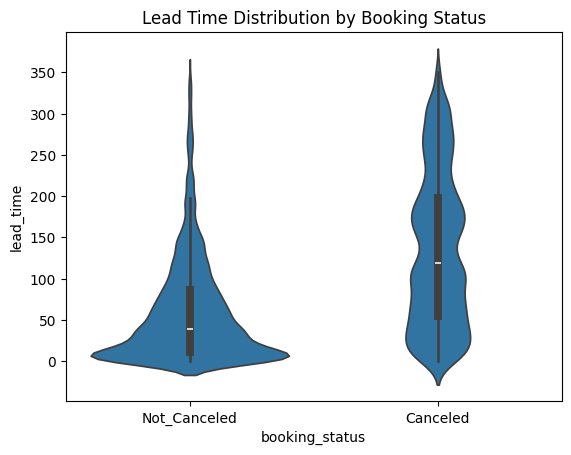

In [38]:
sns.violinplot(data=hotels, x='booking_status', y='lead_time')
plt.title('Lead Time Distribution by Booking Status')
plt.show()

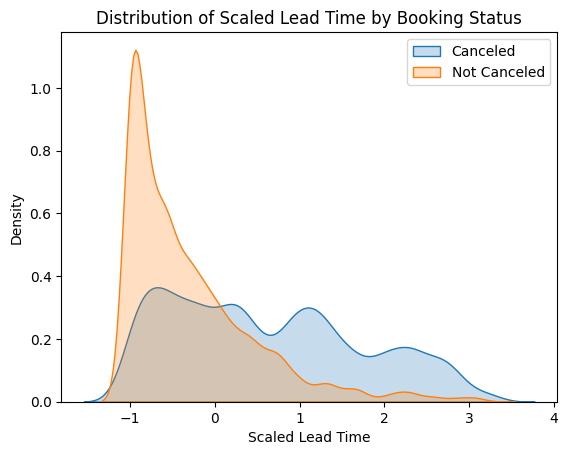

In [39]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='lead_time_scaled', label='Canceled', fill=True)
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='lead_time_scaled', label='Not Canceled', fill=True)
plt.title('Distribution of Scaled Lead Time by Booking Status')
plt.xlabel('Scaled Lead Time')
plt.ylabel('Density')
plt.legend()
plt.show()

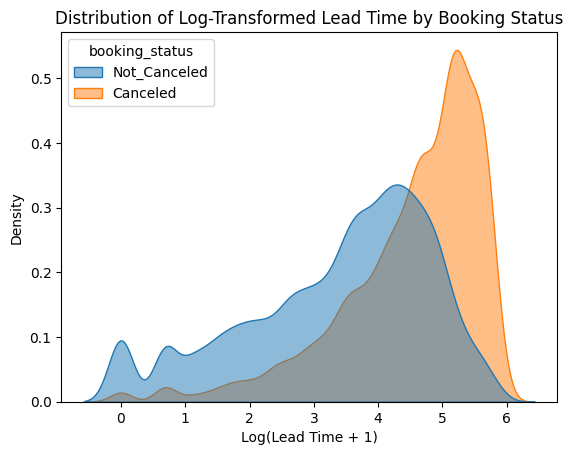

In [40]:
sns.kdeplot(data=hotels, x=np.log1p(hotels['lead_time']), hue='booking_status', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Log-Transformed Lead Time by Booking Status')
plt.xlabel('Log(Lead Time + 1)')
plt.ylabel('Density')
plt.show()

In [41]:
hotels['lead_time_log'] = np.log1p(hotels['lead_time'])

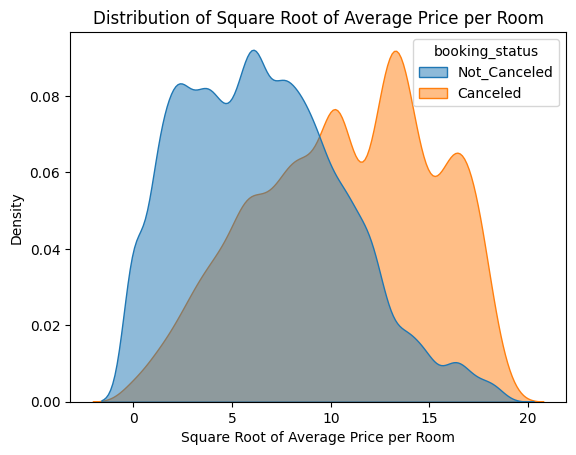

In [42]:
sns.kdeplot(data=hotels, x=np.sqrt(hotels['lead_time']), hue='booking_status', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Square Root of Average Price per Room')
plt.xlabel('Square Root of Average Price per Room')
plt.ylabel('Density')
plt.show()

In [43]:
hotels['lead_time_root'] = np.sqrt(hotels['lead_time'])

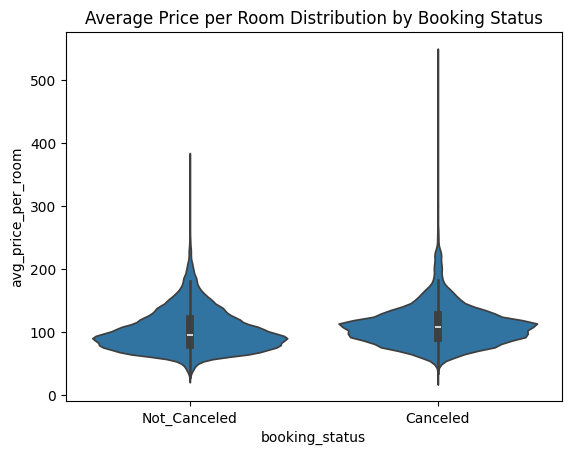

In [44]:
sns.violinplot(data=hotels, x='booking_status', y='avg_price_per_room')
plt.title('Average Price per Room Distribution by Booking Status')
plt.show()

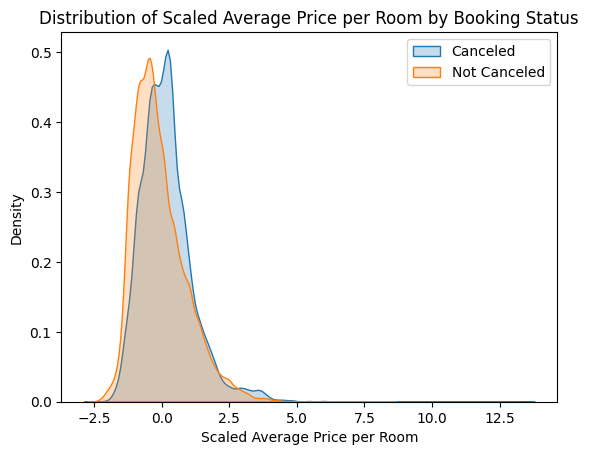

In [45]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='avg_price_per_room_scaled', label='Canceled', fill=True)
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='avg_price_per_room_scaled', label='Not Canceled', fill=True)
plt.title('Distribution of Scaled Average Price per Room by Booking Status')
plt.xlabel('Scaled Average Price per Room')
plt.ylabel('Density')
plt.legend()
plt.show()

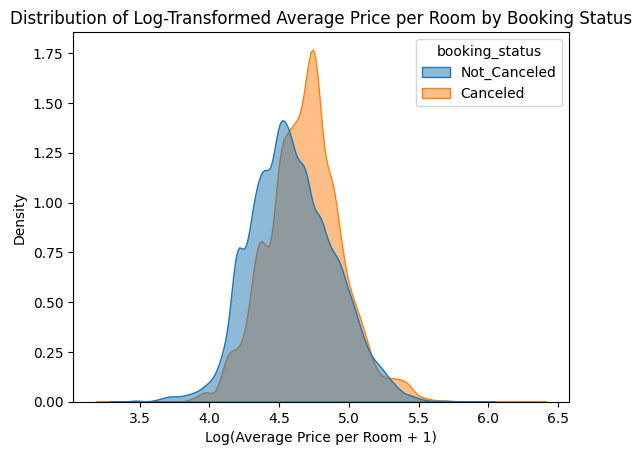

In [46]:
sns.kdeplot(data=hotels, x=np.log1p(hotels['avg_price_per_room']), hue='booking_status', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Log-Transformed Average Price per Room by Booking Status')
plt.xlabel('Log(Average Price per Room + 1)')
plt.ylabel('Density')
plt.show()

In [47]:
hotels['avg_price_per_room_log'] = np.sqrt(hotels['avg_price_per_room'])

In [48]:
hotels['has_special_request'] = (hotels['no_of_special_requests'] > 0).astype(int)

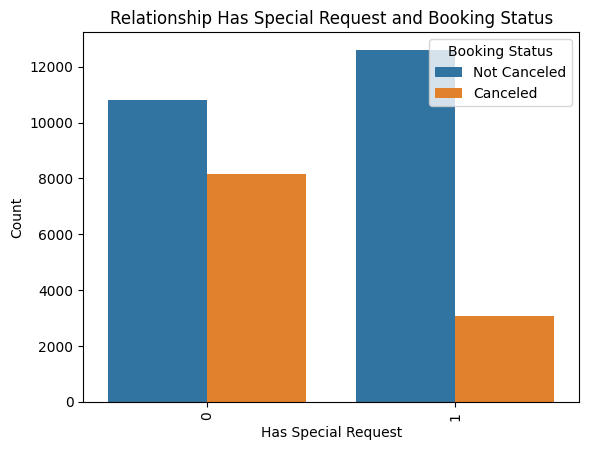

In [49]:
sns.countplot(data=hotels, x='has_special_request', hue='booking_status')
plt.title('Relationship Has Special Request and Booking Status')
plt.xlabel('Has Special Request')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [50]:
hotels['is_canceled'] = (hotels['booking_status'] == 'Canceled').astype(int)

In [51]:
hotels.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'no_of_guests',
       'no_of_nights', 'visit_type', 'meal_type', 'arrival_season',
       'arrival_week', 'market_type', 'previously_canceled',
       'avg_price_per_room_scaled', 'lead_time_scaled', 'lead_time_log',
       'lead_time_root', 'avg_price_per_room_log', 'has_special_request',
       'is_canceled'],
      dtype='object')

In [52]:
clean_hotels = hotels.drop(columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'lead_time_log',
       'lead_time_root', 'avg_price_per_room_log'])

In [53]:
clean_hotels.head(10)

,no_of_guests,no_of_nights,visit_type,meal_type,arrival_season,arrival_week,market_type,previously_canceled,avg_price_per_room_scaled,lead_time_scaled,has_special_request,is_canceled
0,2,3,Both,1,Fall,Week 1,Offline,0,-1.237557,1.712938,0,0
1,2,5,Both,0,Fall,Week 1,Online,0,0.042275,-0.960308,1,0
2,1,3,Both,1,Winter,Week 4,Online,0,-1.391087,-1.009135,0,1
3,2,2,Week,1,Spring,Week 3,Online,0,-0.162842,1.554252,0,1
4,2,2,Both,0,Spring,Week 2,Online,0,-0.331726,-0.435424,0,1
5,2,2,Week,1,Fall,Week 2,Online,0,0.297750,3.202143,1,1
6,2,4,Both,1,Fall,Week 3,Online,0,0.068990,-0.606317,1,0
7,2,4,Both,1,Winter,Week 4,Online,0,0.009420,-0.008193,1,0
8,3,4,Week,1,Summer,Week 1,Offline,0,-0.258031,0.455658,1,0
9,2,5,Week,1,Fall,Week 3,Online,0,0.863972,-0.484251,1,0


In [54]:
visit_type_dummies = pd.get_dummies(clean_hotels['visit_type'], prefix='visit')
meal_type_dummies = pd.get_dummies(clean_hotels['meal_type'], prefix='meal')
arrival_season_dummies = pd.get_dummies(clean_hotels['arrival_season'], prefix='season')
arrival_week_dummies = pd.get_dummies(clean_hotels['arrival_week'], prefix='week')
market_type_dummies = pd.get_dummies(clean_hotels['market_type'], prefix='market')

clean_hotels = clean_hotels.drop(['visit_type', 'meal_type', 'arrival_season', 'arrival_week', 'market_type'], axis=1)

clean_hotels = pd.concat([
    clean_hotels,
    visit_type_dummies,
    meal_type_dummies,
    arrival_season_dummies,
    arrival_week_dummies,
    market_type_dummies
], axis=1)

In [55]:
final_hotels = clean_hotels

In [56]:
final_hotels.head(10)

,no_of_guests,no_of_nights,previously_canceled,avg_price_per_room_scaled,lead_time_scaled,has_special_request,is_canceled,visit_Both,visit_Week,visit_Weekend,...,season_Spring,season_Summer,season_Winter,week_Week 1,week_Week 2,week_Week 3,week_Week 4,market_Offline,market_Online,market_Others
0,2,3,0,-1.237557,1.712938,0,0,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1,2,5,0,0.042275,-0.960308,1,0,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,1,3,0,-1.391087,-1.009135,0,1,True,False,False,...,False,False,True,False,False,False,True,False,True,False
3,2,2,0,-0.162842,1.554252,0,1,False,True,False,...,True,False,False,False,False,True,False,False,True,False
4,2,2,0,-0.331726,-0.435424,0,1,True,False,False,...,True,False,False,False,True,False,False,False,True,False
5,2,2,0,0.297750,3.202143,1,1,False,True,False,...,False,False,False,False,True,False,False,False,True,False
6,2,4,0,0.068990,-0.606317,1,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
7,2,4,0,0.009420,-0.008193,1,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False
8,3,4,0,-0.258031,0.455658,1,0,False,True,False,...,False,True,False,True,False,False,False,True,False,False
9,2,5,0,0.863972,-0.484251,1,0,False,True,False,...,False,False,False,False,False,True,False,False,True,False


# Faza 5: Modelowanie

In [ ]:
# TODO:
# feature importance
# train val test split
# forward selection func
# backward selection func
# logistic regression, knn, lda, qda, naive bayes, decision tree, random forest, svc
# dataframe with accuracy, precision, recall, f1 score, roc auc, confusion matrix AND models / hyperparameters
# cross validation, grid search, bagging, boosting, boostrap
# czy wazniejsze sa TP czy TN
# czas do przeprowadzenia analizy: start, stop
# wizualizacje wynikow

# Faza 6: Ewaluacja

# Faza 7: Wdrożenie